In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# develop a global transfare matrix
def f(x,y):
        difference = x-y
        square = difference**2
        negate = -square
        return  0.1*np.exp(negate/2)
def matrix():
        v = np.linspace(0,10,50)
        w = np.linspace(0,10,50)

        matrix=np.ones((len(v),len(w)))
        for i in range(len(v)):
            for j in range(len(w)): 
                    matrix[i][j]=f(w[j],v[i])
        return matrix
matrix1 = matrix()

In [3]:
#find the constant of normalizing matrix (Pij/Pj)
W=2
P=np.matmul([W]*len(matrix1),matrix1)
con=np.divide(W*matrix1,P)

In [4]:
# Find the measured results (fj)   
x=np.linspace(0,10,50)#defining the x-axis
def find_fj():
    def f(x):
        return (np.exp(-x**2))
    y = np.zeros(len(x))
    for i in range(len(x)):
            y[i]=(f(x[i]))


    f=np.matmul(matrix1,y)
    return f

measured_results = find_fj()
noisy=measured_results.copy()

In [5]:
#distorting measured results
for i in range(len(noisy)):
    if (noisy[i]>0.2):
        noisy[i]= noisy[i] + ((np.random.normal(0,1))*0.09)

In [6]:
def f(x):
    return (np.exp(-x**2))
y = np.zeros(len(x))
for i in range(len(x)):
        y[i]=(f(x[i]))
original=y

In [7]:
#Find working fj:
def working_fj(transfareMatrix,result):
    return np.matmul(transfareMatrix,result)

result=np.ones(len(matrix1[1]))
fnj=working_fj(matrix1,result)

In [8]:
def Regular(recovered):
    c=1 #current
    p=c-1 #past
    f=c+1 #future
    Wrt=0.01 #rationalizing "weight"
    for i in range(len(recovered)-1):
        if ((recovered[p]>recovered[c]) and (recovered[c]<recovered[f])):
            recovered[c]=(recovered[c]/(1-Wrt))
        elif ((recovered[c]>recovered[p]) and (recovered[c]>recovered[p])):
            recovered[c]=(recovered[c]/(1+Wrt))
        else:
            recovered[c]=recovered[c]
        c+=1
        p=c-1
        f=c+1
        if f==len(recovered):
            break
    return recovered

In [9]:
def Recover(actual,measured,varying,k):
    var = np.divide(measured,varying)
    prem_res = np.matmul(var,k)
    final_result= prem_res*actual
    return final_result


In [10]:
rec =np.ones(len(x))
n=0
while (n<50):
    fnj=working_fj(matrix1,rec)
    rec=Recover(rec,noisy,fnj,con)
    rec=Regular(rec)
    n+=1
recovered=rec.copy()

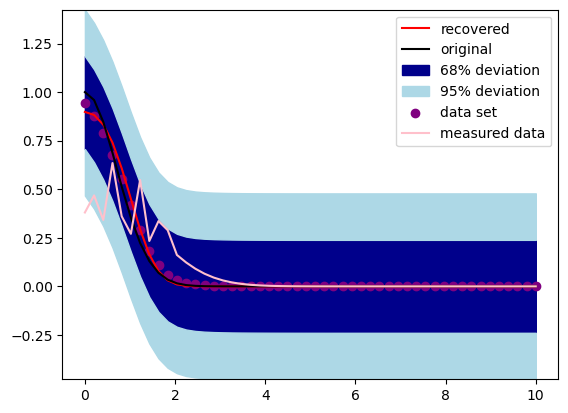

In [11]:
band=[]
sample=[]
deviation=0
average=[]
n=0
numberOfGenerations=50
#creating an error band
rec =np.ones(len(x))
while(n<numberOfGenerations):
        fnj=working_fj(matrix1,rec)
        rec=Recover(rec,noisy,fnj,con)
        rec=Regular(rec)
        band.append(rec)
        n+=1

#finding the average for all the points
j=0
for i in range(len(x)):
    j=0
    sample=[]
    while(j<numberOfGenerations):
            sample.append(band[j][i])
            j+=1
    average.append(np.mean(sample))
                
#finding the standard deviation from the mean
deviation = np.std(average)

#Two sigma band
upperLimit=[]
lowerLimit=[]
for element in average:
    upperLimit.append(element+(2*deviation))
    
for element in average:
    lowerLimit.append(element-(2*deviation))

#make the y axis positive defined
#change the input to vary for every iteration according to the poisson distribution

#Sigma band
upperLimit1=[]
lowerLimit1=[]
for element in average:
    upperLimit1.append(element+(deviation))
    
for element in average:
    lowerLimit1.append(element-(deviation))
    

plt.plot(x,recovered, color='red',label="recovered")
plt.plot(x,original, color ='black',label="original")
plt.fill_between(x,lowerLimit1,upperLimit1,color="darkblue",label="68% deviation")
plt.fill_between(x,lowerLimit,lowerLimit1,color="lightblue",label="95% deviation")
plt.fill_between(x,upperLimit1,upperLimit,color="lightblue")
plt.scatter(x,average, color='purple', label="data set")
plt.ylim(min(lowerLimit),max(upperLimit))
#plt.xlim(min(x),3.5)
plt.plot(x,noisy,color="pink",label="measured data")
#plt.plot(x,measured_results,color="yellow",label="measured")
plt.legend()
plt.show()

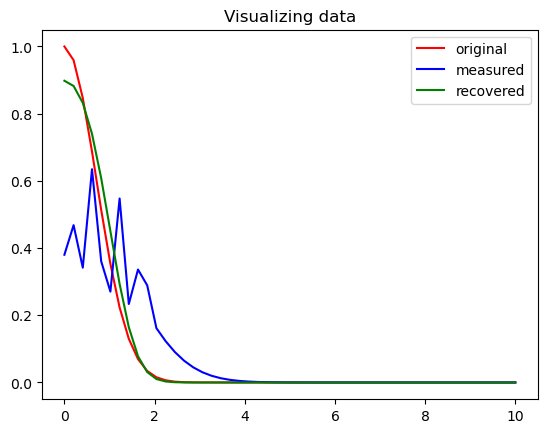

In [12]:

    plt.plot(x,original,"red",label="original")
    plt.plot(x,noisy,"blue",label="measured")
    plt.plot(x,recovered,"green",label="recovered")
    plt.title("Visualizing data")
    plt.legend()
    plt.show()